<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%201/04_Logistic_Regression_Hero_Kartiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Melakukan Import libraries


## Importing the dataset


In [ ]:
#Import Dataset
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 1/Social_Network_Ads.csv')

Mounted at /content/drive


Melakukan import dataset dari google drive dengan menggunakan mount lalu melakukan pembacaan file melalui path yang terdapat di google drive

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

#Membuat 'Age' dan 'EstimatedSalary' sebagai fitur
X = dataset[['Age', 'EstimatedSalary']]  # Fitur (X)
y = dataset['Purchased']  # Target yang ingin diprediksi (y)

# Split dataset menjadi training set dan test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



*   **X** : berisi fitur yang digunakan untuk prediksi (di sini adalah umur dan gaji yang diperkirakan).
*   **y** : target yang ingin diprediksi, dalam hal ini adalah apakah orang tersebut membeli (Purchased).
*   **train_test_split** : membagi dataset menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan perbandingan 80% untuk training set dan 20% untuk test set. Parameter random_state=42 digunakan agar hasil pembagian dataset selalu konsisten.
*   **test_size = 0.2** berarti 20% dari dataset akan digunakan untuk test set, dan sisanya 80% untuk training set.

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. **X_train = scaler.fit_transform(X_train) :**

  Bagian ini melakukan dua hal pada data X_train:
  *   fit(X_train): Menghitung nilai rata-rata (mean) dan standar deviasi (standard deviation) dari setiap fitur dalam training set. Nilai-nilai ini akan digunakan sebagai acuan untuk normalisasi data.
  *  transform(X_train): Menggunakan nilai rata-rata dan standar deviasi yang telah dihitung untuk menormalkan data training set. Setiap nilai fitur akan dihitung dengan rumus :
  
    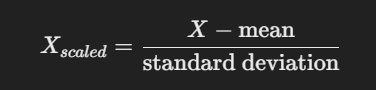
  
  Ini menghasilkan X_train yang sudah dinormalisasi, di mana setiap fitur memiliki rata-rata 0 dan standar deviasi 1.

2. X_test = scaler.transform(X_test):
  
  * Bagian ini menerapkan scaling yang sama (rata-rata dan standar deviasi yang dihitung dari training set) ke data test set. Ini dilakukan agar skala data test set konsisten dengan training set.





## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**1.   model = LogisticRegression():**
*   Membuat sebuah objek model dari kelas LogisticRegression.
*   Objek model ini berfungsi sebagai model klasifikasi yang akan dilatih menggunakan data training set.
*   Parameter default digunakan di sini, tetapi Anda bisa menyesuaikannya dengan parameter lain sesuai kebutuhan, seperti:
  * solver: Metode optimasi yang digunakan (misalnya 'liblinear', 'saga', 'lbfgs').
  * penalty: Jenis regulasi yang digunakan ('l2', 'l1', dll.).
  * max_iter: Jumlah iterasi maksimum untuk mencapai konvergensi.

**2.   model.fit(X_train, y_train):**
* Baris ini digunakan untuk melatih model LogisticRegression dengan menggunakan training set, yaitu X_train (fitur) dan y_train (target).
* X_train adalah matriks yang berisi fitur-fitur yang akan digunakan untuk memprediksi target, sementara y_train adalah label atau target yang ingin diprediksi oleh model.
* Fungsi fit akan:
  * Menghitung koefisien (coefficients) dari setiap fitur pada X_train untuk menemukan garis keputusan (decision boundary) yang memisahkan kelas-kelas pada y_train.
  * Menentukan nilai bias (intercept) yang menggeser garis keputusan tersebut.
  * Menggunakan metode optimisasi (misalnya, gradient descent) untuk meminimalkan kesalahan prediksi pada training set.

  Setelah model.fit() dijalankan, model akan siap digunakan untuk melakukan prediksi pada data baru, baik untuk training set, test set, maupun data yang tidak dikenal.

## Predicting a new result

In [ ]:
# Memprediksi data set baru
y_pred = model.predict(X_test)

## Predicting the Test set results

In [ ]:
# Memprediksi Hasil dataset baru
accuracy = accuracy_score(y_test, y_pred)

## Making the Confusion Matrix

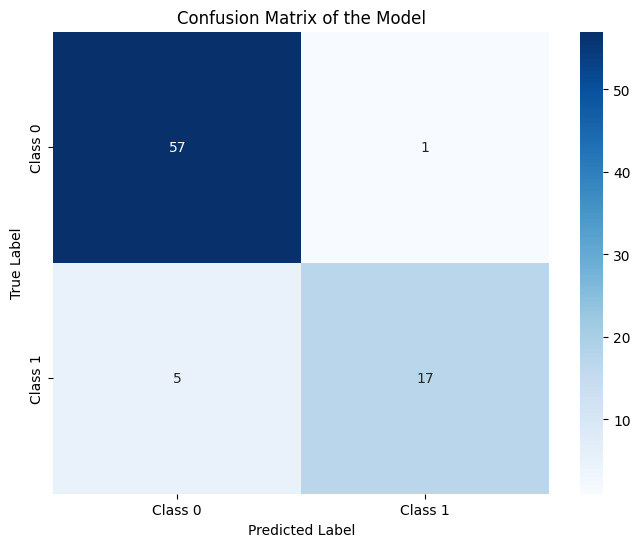

In [ ]:
cm = confusion_matrix(y_test, y_pred)

def plot_decision_boundary(X, y, model, set_type):
    # Menentukan batas x dan y untuk grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prediksi model untuk setiap titik pada grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

# Membuat visualisasi confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix of the Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



1. **Fungsi plot_decision_boundary :**
  *   plot_decision_boundary(X, y, model, set_type) digunakan untuk membuat decision boundary berdasarkan hasil prediksi model.
  *   Menggunakan np.meshgrid untuk membuat grid area pada data.
  *   model.predict digunakan untuk memprediksi hasil pada setiap titik di grid.
  * plt.contourf digunakan untuk menampilkan batas keputusan, dan plt.scatter untuk menampilkan data asli.

2. **Visualisasi Training Set :**
    * plot_decision_boundary(X_train, y_train, model, 'Training') akan menampilkan hasil training set.

3. **Visualisasi Test Set :**
    * plot_decision_boundary(X_test, y_test, model, 'Test') akan menampilkan hasil test set.


## Visualising the Training set results

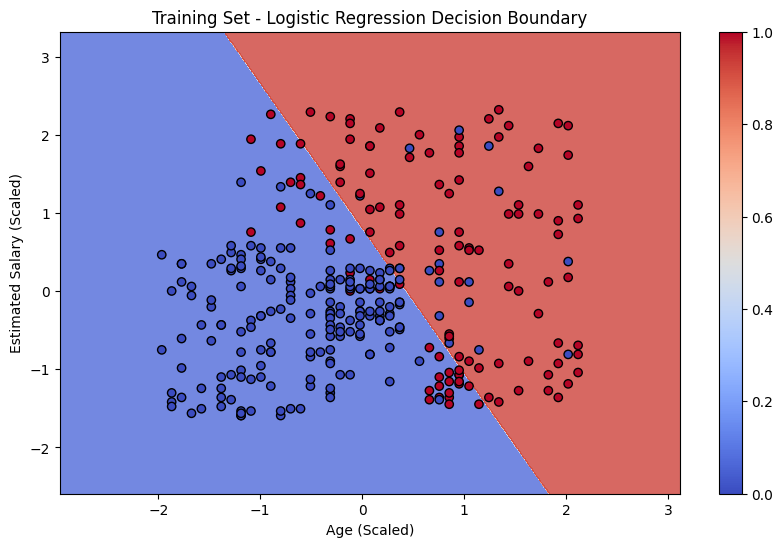

In [ ]:
# Visualisasi hasil training set
plot_decision_boundary(X_train, y_train, model, 'Training')

## Visualising the Test set results

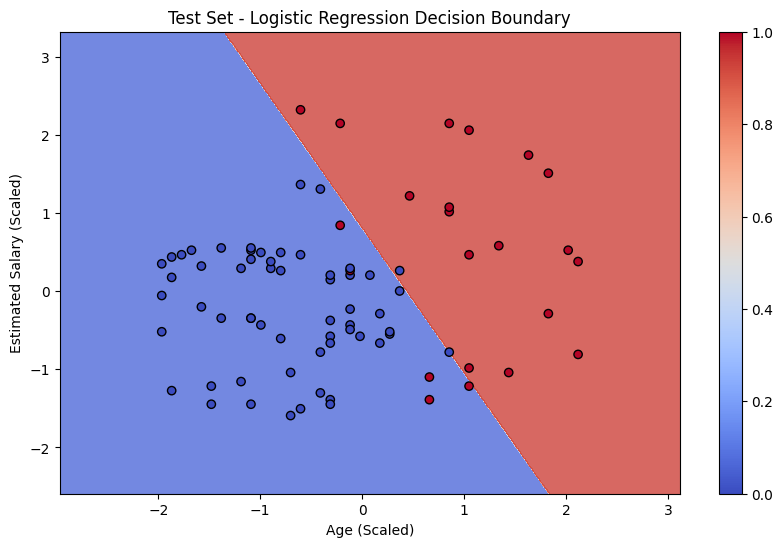

In [ ]:
# Visualisasi hasil test set
plot_decision_boundary(X_test, y_test, model, 'Test')